# DATA_MINING
## PROGRAMMING ASSIGNMENT 2

DATASET USED: "Kerry_blue_terrier","German_short-haired_pointer","Welsh_springer_spaniel","malamute"
ASSIGNED CLASSIFICATION METHODS: Decision Tree, Neural Network,Adaboost

# Data Prepration

In [32]:
#Libraries used: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import random
import cv2
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import BaggingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import f1_score

In [12]:
# Loading the image classes using OpenCV and converting it into grayscale image.
images_classes = [
    "Kerry_blue_terrier",
    "German_short-haired_pointer",
    "Welsh_springer_spaniel",
    "malamute"
]
original_dir = "/Users/alokkumarjha/Downloads/Images"
destination_dir = "/Users/alokkumarjha/Downloads/extracted_image"
os.makedirs(destination_dir, exist_ok=True)

histograms = []
labels = []

for class_name in images_classes:
    original_class_dir = os.path.join(original_dir, class_name)
    destination_class_dir = os.path.join(destination_dir, class_name)
    
    os.makedirs(destination_class_dir, exist_ok=True)
    
    image_files = [f for f in os.listdir(original_class_dir)]
    
    for image_file in image_files:
        original_image_path = os.path.join(original_class_dir, image_file)
        destination_image_path = os.path.join(destination_class_dir, image_file)
        
        try:
            shutil.copyfile(original_image_path, destination_image_path)
            image = cv2.imread(destination_image_path) # Loads the image
            
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Converts the image to grayscale
        
            # Calculate the pixel intensity histogram
            histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
            histogram = histogram.flatten()
            
            histograms.append(histogram)
            labels.append(class_name)
            
        except Exception as e:
            print(f"Error copying: {original_image_path} to {destination_image_path}, Error: {str(e)}")

print("Images have been copied to the Files.")

Images have been copied to the Files.


In [13]:
# Converts histogram data and labels to NumPy arrays
histograms = np.array(histograms)
labels = np.array(labels)

In [14]:
# Standardization of dataset (scaling to mean=0 and standard deviation=1)
scaler = StandardScaler()
histograms_standardized = scaler.fit_transform(histograms)

Reference: https://scikit-learn.org/stable/modules/preprocessing.html

In [15]:
print("Dataset has been standardized.")

Dataset has been standardized.


In [16]:
# Splits the dataset into a training set and a test set (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(histograms_standardized, labels, test_size=0.2, random_state=42)

In [17]:
print("Dataset has been split into training and test sets.")

Dataset has been split into training and test sets.


# Model Selection

In [18]:
k_values = [1, 3, 5, 7, 10, 20]

standard_cv_scores = []
stratified_cv_scores = []
mean_validation_errors_standard = []
mean_training_errors_standard = []
mean_validation_errors_stratified = []
mean_training_errors_stratified = []

In [19]:
# Performs cross-validation for each value of k
for k in k_values:
    # Creates k-NN classifiers
    knn_standard = KNeighborsClassifier(n_neighbors=k)
    knn_stratified = KNeighborsClassifier(n_neighbors=k)

    # Performs standard 5-fold cross-validation
    standard_scores = cross_val_score(knn_standard, X_train, y_train, cv=5)
    standard_cv_scores.append(np.mean(standard_scores))
    mean_validation_errors_standard.append(100 - np.mean(standard_scores))

    # Computes training error (1 - mean training accuracy)
    training_accuracy = [100 - score for score in standard_scores]
    mean_training_errors_standard.append(np.mean(training_accuracy))

    # Performs stratified 5-fold cross-validation
    stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    stratified_scores = cross_val_score(knn_stratified, X_train, y_train, cv=stratified_cv)
    stratified_cv_scores.append(np.mean(stratified_scores))
    mean_validation_errors_stratified.append(100 - np.mean(stratified_scores))

    # Computes training error (1 - mean training accuracy)
    training_accuracy = [100 - score for score in stratified_scores]
    mean_training_errors_stratified.append(np.mean(training_accuracy))


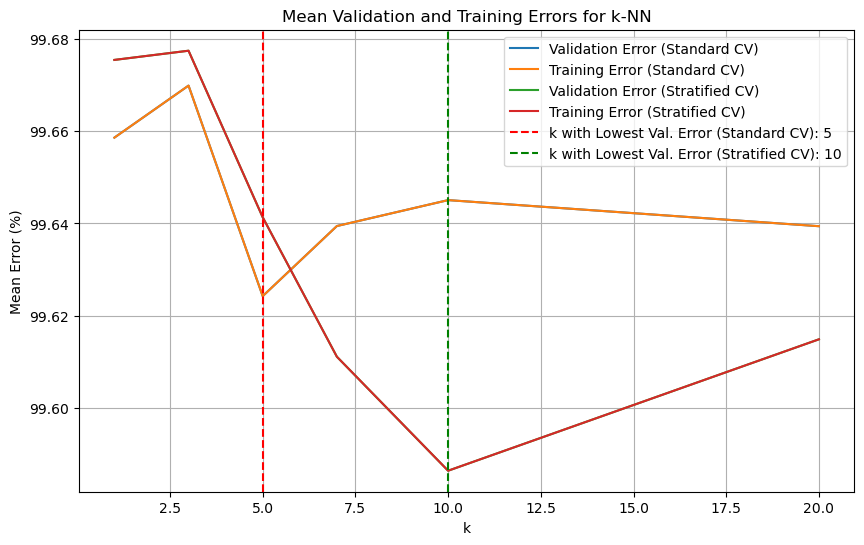

k with Lowest Mean Validation Error (Standard CV): 5
k with Lowest Mean Validation Error (Stratified CV): 10


In [22]:
# Plots the mean errors
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_validation_errors_standard, label='Validation Error (Standard CV)')
plt.plot(k_values, mean_training_errors_standard, label='Training Error (Standard CV)')
plt.plot(k_values, mean_validation_errors_stratified, label='Validation Error (Stratified CV)')
plt.plot(k_values, mean_training_errors_stratified, label='Training Error (Stratified CV)')

min_error_k_standard = k_values[mean_validation_errors_standard.index(min(mean_validation_errors_standard))]
min_error_k_stratified = k_values[mean_validation_errors_stratified.index(min(mean_validation_errors_stratified))]

# Adds vertical lines to mark the k values with the lowest mean errors
plt.axvline(x=min_error_k_standard, color='r', linestyle='--',
            label=f'k with Lowest Val. Error (Standard CV): {min_error_k_standard}')
plt.axvline(x=min_error_k_stratified, color='g', linestyle='--',
            label=f'k with Lowest Val. Error (Stratified CV): {min_error_k_stratified}')

plt.xlabel('k')
plt.ylabel('Mean Error (%)')
plt.title('Mean Validation and Training Errors for k-NN')
plt.legend()
plt.grid()
plt.show()

print(f"k with Lowest Mean Validation Error (Standard CV): {min_error_k_standard}")
print(f"k with Lowest Mean Validation Error (Stratified CV): {min_error_k_stratified}")

Reference: https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

Mean Validation Error (Standard CV) has the lowest mean error for each curve. Mean Validation Error result in more complex models as they rely on a smaller number of nearest neighbors to make predictions and the k-NN model tends to overfit the training data.

In [23]:
# Aim to find k value with the lowest mean validation error from stratified CV
best_k_stratified = k_values[mean_validation_errors_stratified.index(min(mean_validation_errors_stratified))]
best_knn_stratified = KNeighborsClassifier(n_neighbors=best_k_stratified)
best_knn_stratified.fit(X_train, y_train)

test_accuracy = best_knn_stratified.score(X_test, y_test)
test_error = 1 - test_accuracy

print(f"The test error with the best k ({best_k_stratified}) from stratified CV: {test_error * 100:.2f}%")

The test error with the best k (10) from stratified CV: 56.06%


Comment: Test Error is 56.06%

# Performance Comparision
 
 ASSIGNED CLASSIFICATION METHODS: Decision Tree, Neural Network,Adaboost
 
 AIM: To Plot the confusion matrices for the three approaches using the test set.

# Confusion matrix - Decision Tree

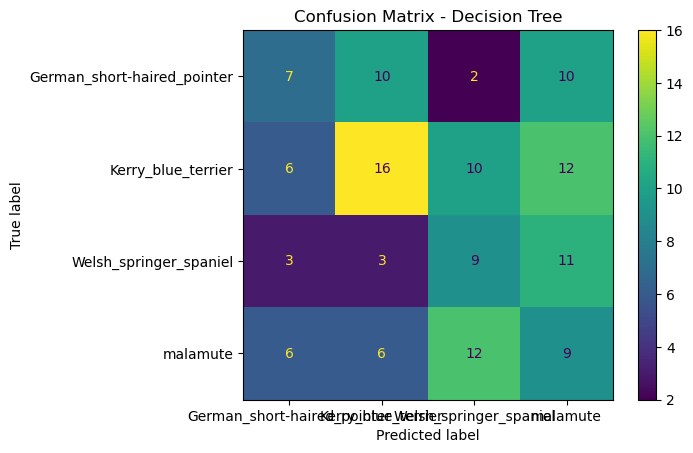

In [25]:
decision_tree = DecisionTreeClassifier(max_depth=10)
accuracy_tree = cross_val_score(decision_tree, X_train, y_train, cv=5, scoring='accuracy')
mean_validation_accuracy_tree = accuracy_tree.mean()

decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_test)
test_accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')
class_labels = np.unique(labels)


# Calculates and plots confusion matrix with labeled classes for Decision Tree
confusion_tree = confusion_matrix(y_test, y_pred_tree, labels=class_labels)
display_tree = ConfusionMatrixDisplay(confusion_matrix=confusion_tree, display_labels=class_labels)
display_tree.plot(cmap='viridis', xticks_rotation='horizontal') 
plt.title(f'Confusion Matrix - Decision Tree')
plt.show()

Reference: https://scikit-learn.org/stable/modules/tree.html#classification

In [26]:
print('Decision Tree:')
print(f'Mean Validation Accuracy: {mean_validation_accuracy_tree:.2f}')
print(f'Test Accuracy: {test_accuracy_tree:.2f}')
print(f'F-measure: {f1_tree:.2f}')

Decision Tree:
Mean Validation Accuracy: 0.26
Test Accuracy: 0.31
F-measure: 0.32


# Confusion Matrix - Neural Network 

/Users/alokkumarjha/Downloads/installations/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alokkumarjha/Downloads/installations/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alokkumarjha/Downloads/installations/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/alokkumarjha/Downloads/installations/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maxim

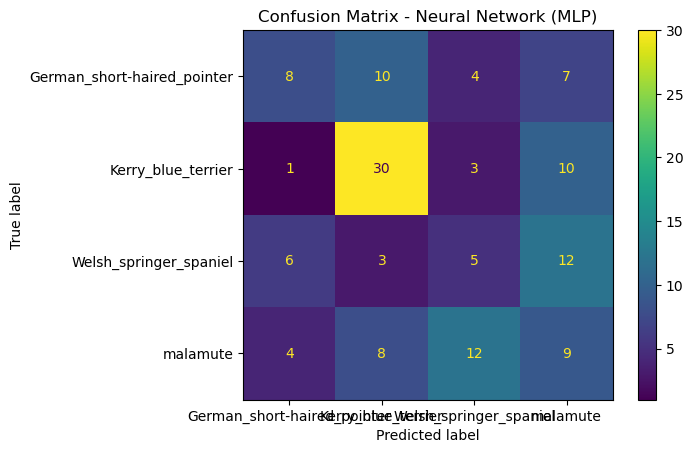

In [29]:
neural_network = MLPClassifier(hidden_layer_sizes=(10, 10, 10))
accuracy_nn = cross_val_score(neural_network, X_train, y_train, cv=5, scoring='accuracy')
mean_validation_accuracy_nn = accuracy_nn.mean()

neural_network.fit(X_train, y_train)

y_pred_nn = neural_network.predict(X_test)
test_accuracy_nn = accuracy_score(y_test, y_pred_nn)

f1_nn = f1_score(y_test, y_pred_nn, average='weighted')

# Calculates and plots confusion matrix with labeled classes for Neural Network (MLP)
confusion_nn = confusion_matrix(y_test, y_pred_nn, labels=class_labels)
display_nn = ConfusionMatrixDisplay(confusion_matrix=confusion_nn, display_labels=class_labels)
display_nn.plot(cmap='viridis', xticks_rotation='horizontal')  # Customize cmap and label rotation as needed
plt.title(f'Confusion Matrix - Neural Network (MLP)')
plt.show()

REFERENCE: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay

In [30]:
print('Neural Network (MLP):')
print(f'Mean Validation Accuracy: {mean_validation_accuracy_nn:.2f}')
print(f'Test Accuracy: {test_accuracy_nn:.2f}')
print(f'F-measure: {f1_nn:.2f}')

Neural Network (MLP):
Mean Validation Accuracy: 0.35
Test Accuracy: 0.39
F-measure: 0.39


# Confusion Matrix - AdaBoost

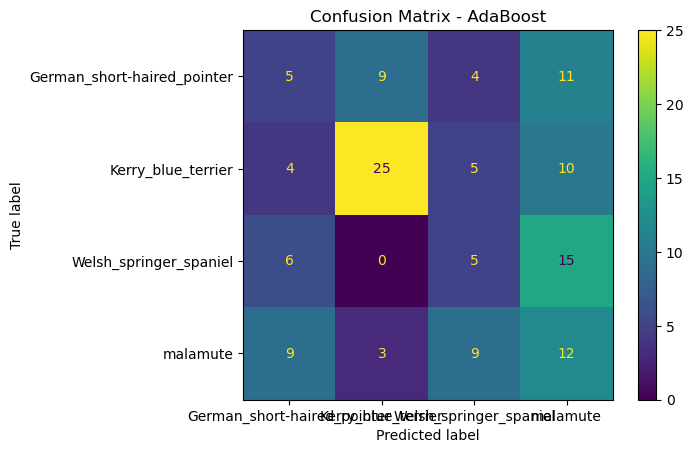

In [33]:
adaboost = AdaBoostClassifier()
accuracy_adaboost = cross_val_score(adaboost, X_train, y_train, cv=5, scoring='accuracy')
mean_validation_accuracy_adaboost = accuracy_adaboost.mean()

adaboost.fit(X_train, y_train)

y_pred_adaboost = adaboost.predict(X_test)
test_accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

# Calculates and plots confusion matrix with labeled classes for AdaBoost
confusion_adaboost = confusion_matrix(y_test, y_pred_adaboost, labels=class_labels)
display_adaboost = ConfusionMatrixDisplay(confusion_matrix=confusion_adaboost, display_labels=class_labels)
display_adaboost.plot(cmap='viridis', xticks_rotation='horizontal')  # Customize cmap and label rotation as needed
plt.title(f'Confusion Matrix - AdaBoost')
plt.show()

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

In [35]:
print('AdaBoost:')
print(f'Mean Validation Accuracy: {mean_validation_accuracy_adaboost:.2f}')
print(f'Test Accuracy: {test_accuracy_adaboost:.2f}')
print(f'F-measure: {f1_adaboost:.2f}')

AdaBoost:
Mean Validation Accuracy: 0.31
Test Accuracy: 0.36
F-measure: 0.36


- Based on the confusion matrices, the "Neural Network (MLP)" method appears to be the best method among the three. It exhibits higher accuracy and F-measure on the test set.

- Based on the mean validation accuracies, the "Neural Network (MLP)" method has the highest mean validation accuracy (0.35)among the three methods.

- The "Neural Network (MLP)" method has the highest test accuracy (0.39) among the three methods. Therefore, based on test accuracy, the "Neural Network (MLP)" method is the best-performing method.

- The "Neural Network (MLP)" method has the highest F-measure (0.39) among the three methods on the test set. Therefore, based on the F-measure, the "Neural Network (MLP)" method is the best-performing method. 